<a href="https://colab.research.google.com/github/Data4Bioinfo/XVI-Curso-de-Bioinform-tica---USP-2025-/blob/main/Intro_Biopython_CV2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução ao BioPython** 💻🐍


### Curso de Verão em Bioinformática - USP (2025), *Ma. Rayana Feltrin*

#### **Breve revisão dos principais conceitos do Python**

**Indentação** (recuo): obrigatória em Python, gerando blocos de código com "hierarquia"

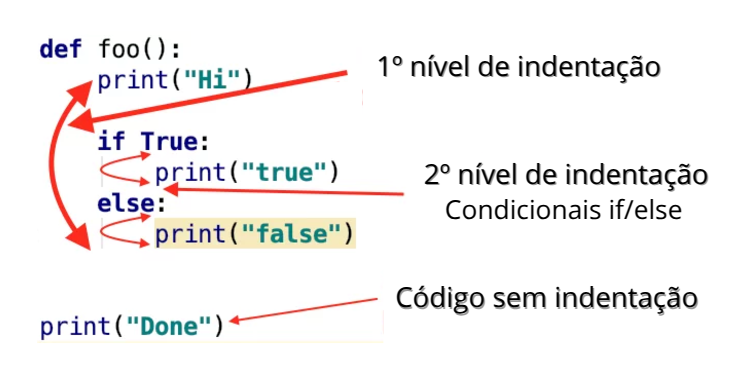

*   **Listas:** estruturas de dados que agrupam um conjunto de elementos indexáveis

    `primatas = ["Homo sapiens", "Pan troglodytes", "Gorilla gorilla", "Callithrix jacchus"]`

*   **Dicionários:** estrutura que armazena valores pareados também indexados

    `basesComplem = {"A":"T", "T":"A, "C":"G", "G":"C"}`

*   **Loops:** permitem a execução de uma determinada instrução repetidamente, geralmente variando algum elemento Ex.: `for`, `while`

In [ ]:
# Criando um dicionário de acordo com a complementaridade de bases
basesDict = {"A":"T", "T":"A", "C":"G", "G":"C"}

# Obtendo o valor correspondente a uma chave
print(basesDict["A"])

In [ ]:
# Fazendo o DNA complementar
cDNA = ""

# Percorrendo a sequência de DNA
for base in sequence:
  cDNA += myDict[base]

print(cDNA)



*   **Condicionais:** realizam testes baseados em condições (`if`, `elif`, `else`), cujo resultado direciona as etapas seguintes do código

In [ ]:
## Supondo que genes são diferencialmente expressos quando a quantificação da expressão é maior que 100

geneExpression = 125

# Se a expressão for maior que 100
if geneExpression > 100: # >, operador lógico

  # Caso for verdade (True), imprima que o gene é altamente expresso
  print("O gene é altamente expresso")

In [ ]:
geneExpression = 80

#  Se a expressão for maior que 100
if geneExpression > 100:
  print("O gene é altamente expresso")

# Caso contrário (False)
else:
  print("O gene não é altamente expresso")

### Recursos/oportunidades interessantes para aprender Python:
- **Rosalind:** https://rosalind.info/problems/locations/
- **PyLadies Bioinformática** (inscrições abertas até 22/02): https://lnkd.in/d8gMEyg9, Instagram `@pyladiesbioinfo`

## **Biopython** 🧬

Lançado em 2000, o Biopython é uma biblioteca em Python que contém um conjunto de ferramentas voltado para análises em Biologia Molecular Computacional

*   Possibilidade de lidar com arquivos de output do BLAST, bem como formatos CLUSTALW, FASTA, GenBank, dados relacionados ao PubMed, MedLine, ExPASy, SCOP, UniGene e SwissProt

*   **Foco da aula:** manipulação de sequências biológicas

**Tutorial e cookbook:** https://biopython.org/DIST/docs/tutorial/Tutorial-1.83.html

**Documentação:** https://biopython.org/wiki/Documentation

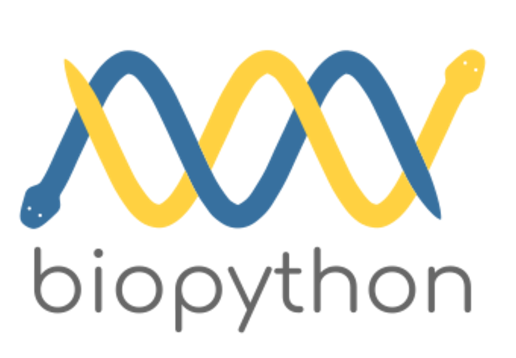

#### **Instalando o Biopython**

In [ ]:
!pip install biopython

In [ ]:
## Carregando o módulo do Biopython que lida com sequências biológicas

# Importando a classe Seq do módulo Bio.Seq
from Bio.Seq import Seq

Sequências biológicas são manipuladas como **objetos Seq** (string em Python + métodos biológicos)

In [ ]:
 minhaSeqDNA = Seq("AGTACACTGGT")
 print(minhaSeqDNA)

In [ ]:
# Verificando o tipo de variável
type(minhaSeqDNA) #não é uma str clássica do Python

#### **Gerando sequências complementares de DNA** 🧬
Método complement: `DNAseq.complement()`

In [ ]:
minhaSeqCompl = minhaSeq.complement() #sem argumentos

print("Fita molde:", minhaSeq)
print("Fita compl:", minhaSeqCompl)

**Reverso complemento**

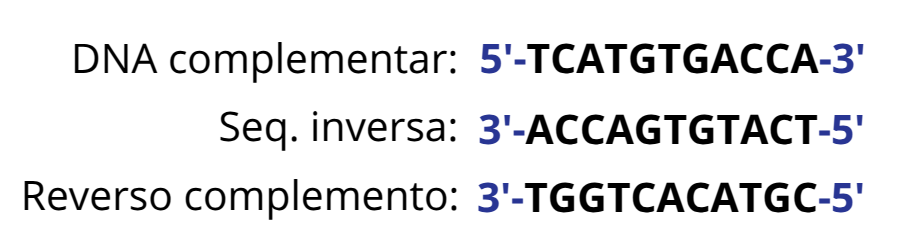

Método reverse complement: `DNAseq.reverse_complement()`

In [ ]:
meuReversoCompl = minhaSeqCompl.reverse_complement()

print("Fita complementar: ", minhaSeqCompl)
print("Fita rev. complem.:", meuReversoCompl)

*   Vários métodos para strings também podem ser usados aqui, ex.: `.find`, `.count`, além da própria função `len`



#### **Transcrevendo o DNA em RNA**

Na aula anterior, utilizamos o método `.replace()` para substituir o T do DNA em U no RNA

O Biopython já tem um método especial para isso, o `.transcribe()`

Sintaxe: `DNAseq.transcribe()`

In [ ]:
# Vamos usar a minhaSeqDNA
minhaSeqRNA = minhaSeqDNA.transcribe()

print("DNA:", minhaSeqDNA)
print("RNA:", minhaSeqRNA)

Porém, caso seja a fita molde (3' -> 5'), é preciso calcular antes o reverso complemento.

#### **Traduzindo a informação genética**

Método translate: `sequencia.translate()` ↪  aqui, a sequência pode ser de RNA ou DNA

In [ ]:
novaSeqRNA = Seq("AUGGCCAUUCGCAAGGGUGCCCGAUAG")

proteina = novaSeqRNA.translate()
print("Proteína:", proteina)

# O asterisco final corresponde ao stop códon

#### **Calculando o conteúdo GC de uma sequência**

O percentual de GC de uma sequência é importante na hora de desenhar um primer para PCR, por exemplo (temperatura de melting), ou até mesmo para inferir o gênero ou espécie de um organismo. Veja como essa medida varia entre diferentes espécies:

- Humanos: de 35% a 60%;
- *Saccharomyces cerevisiae:* ~ 38%;
- *Arabidopsis thaliana:* ~ 36%;
- *Plasmodium falciparum:*: ~ 20% (rico em AT)
- Micobactérias: 64 a 70%

Vamos calcular o conteúdo GC do gene que codifica a proteína spike do SARS-CoV-2, cuja região mais conservada era utilizada no PCR para detecção da presença do vírus na época da pandemia!

```
# Gene da proteína spike

>NC_045512.2:21563-25384 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAAT
TACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGT
TTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTC
TCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTT
CCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCT
ACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTT
TTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGA
ATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAA
AAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATT
AATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTA
ACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGG
TTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAAT
GAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGA
AATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGT
TAGATTTCCTAATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTGTT
TATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATCAT
TTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGC
AGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAAGATTGCTGAT
TATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTCTA
AGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGA
TATTTCAACTGAAATCTATCAGGCCGGTAGCACACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACTTT
CCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACTTT
CTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAACAA
ATGTGTCAATTTCAACTTCAATGGTTTAACAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTCTG
CCTTTCCAACAATTTGGCAGAGACATTGCTGACACTACTGATGCTGTCCGTGATCCACAGACACTTGAGA
TTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAATACTTCTAACCA
GGTTGCTGTTCTTTATCAGGATGTTAACTGCACAGAAGTCCCTGTTGCTATTCATGCAGATCAACTTACT
CCTACTTGGCGTGTTTATTCTACAGGTTCTAATGTTTTTCAAACACGTGCAGGCTGTTTAATAGGGGCTG
AACATGTCAACAACTCATATGAGTGTGACATACCCATTGGTGCAGGTATATGCGCTAGTTATCAGACTCA
GACTAATTCTCCTCGGCGGGCACGTAGTGTAGCTAGTCAATCCATCATTGCCTACACTATGTCACTTGGT
GCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTGCCATACCCACAAATTTTACTATTAGTGTTACCA
CAGAAATTCTACCAGTGTCTATGACCAAGACATCAGTAGATTGTACAATGTACATTTGTGGTGATTCAAC
TGAATGCAGCAATCTTTTGTTGCAATATGGCAGTTTTTGTACACAATTAAACCGTGCTTTAACTGGAATA
GCTGTTGAACAAGACAAAAACACCCAAGAAGTTTTTGCACAAGTCAAACAAATTTACAAAACACCACCAA
TTAAAGATTTTGGTGGTTTTAATTTTTCACAAATATTACCAGATCCATCAAAACCAAGCAAGAGGTCATT
TATTGAAGATCTACTTTTCAACAAAGTGACACTTGCAGATGCTGGCTTCATCAAACAATATGGTGATTGC
CTTGGTGATATTGCTGCTAGAGACCTCATTTGTGCACAAAAGTTTAACGGCCTTACTGTTTTGCCACCTT
TGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTGTTAGCGGGTACAATCACTTCTGGTTGGAC
CTTTGGTGCAGGTGCTGCATTACAAATACCATTTGCTATGCAAATGGCTTATAGGTTTAATGGTATTGGA
GTTACACAGAATGTTCTCTATGAGAACCAAAAATTGATTGCCAACCAATTTAATAGTGCTATTGGCAAAA
TTCAAGACTCACTTTCTTCCACAGCAAGTGCACTTGGAAAACTTCAAGATGTGGTCAACCAAAATGCACA
AGCTTTAAACACGCTTGTTAAACAACTTAGCTCCAATTTTGGTGCAATTTCAAGTGTTTTAAATGATATC
CTTTCACGTCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTGATCACAGGCAGACTTCAAAGTT
TGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCTAATCTTGCTGCTAC
TAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTTTGTGGAAAGGGCTATCATCTTATG
TCCTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTTGCATGTGACTTATGTCCCTGCACAAGAAAAGA
ACTTCACAACTGCTCCTGCCATTTGTCATGATGGAAAAGCACACTTTCCTCGTGAAGGTGTCTTTGTTTC
AAATGGCACACACTGGTTTGTAACACAAAGGAATTTTTATGAACCACAAATCATTACTACAGACAACACA
TTTGTGTCTGGTAACTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACCTG
AATTAGACTCATTCAAGGAGGAGTTAGATAAATATTTTAAGAATCATACATCACCAGATGTTGATTTAGG
TGACATCTCTGGCATTAATGCTTCAGTTGTAAACATTCAAAAAGAAATTGACCGCCTCAATGAGGTTGCC
AAGAATTTAAATGAATCTCTCATCGATCTCCAAGAACTTGGAAAGTATGAGCAGTATATAAAATGGCCAT
GGTACATTTGGCTAGGTTTTATAGCTGGCTTGATTGCCATAGTAATGGTGACAATTATGCTTTGCTGTAT
GACCAGTTGCTGTAGTTGTCTCAAGGGCTGTTGTTCTTGTGGATCCTGCTGCAAATTTGATGAAGACGAC
TCTGAGCCAGTGCTCAAAGGAGTCAAATTACATTACACATAA

```

In [ ]:
# Calculando apenas com o Python
geneSpike = "ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACAAACTTGTGCCCTTTTGGTGAAGTTTTTAACGCCACCAGATTTGCATCTGTTTATGCTTGGAACAGGAAGAGAATCAGCAACTGTGTTGCTGATTATTCTGTCCTATATAATTCCGCATCATTTTCCACTTTTAAGTGTTATGGAGTGTCTCCTACTAAATTAAATGATCTCTGCTTTACTAATGTCTATGCAGATTCATTTGTAATTAGAGGTGATGAAGTCAGACAAATCGCTCCAGGGCAAACTGGAAAGATTGCTGATTATAATTATAAATTACCAGATGATTTTACAGGCTGCGTTATAGCTTGGAATTCTAACAATCTTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAGCACACCTTGTAATGGTGTTGAAGGTTTTAATTGTTACTTTCCTTTACAATCATATGGTTTCCAACCCACTAATGGTGTTGGTTACCAACCATACAGAGTAGTAGTACTTTCTTTTGAACTTCTACATGCACCAGCAACTGTTTGTGGACCTAAAAAGTCTACTAATTTGGTTAAAAACAAATGTGTCAATTTCAACTTCAATGGTTTAACAGGCACAGGTGTTCTTACTGAGTCTAACAAAAAGTTTCTGCCTTTCCAACAATTTGGCAGAGACATTGCTGACACTACTGATGCTGTCCGTGATCCACAGACACTTGAGATTCTTGACATTACACCATGTTCTTTTGGTGGTGTCAGTGTTATAACACCAGGAACAAATACTTCTAACCAGGTTGCTGTTCTTTATCAGGATGTTAACTGCACAGAAGTCCCTGTTGCTATTCATGCAGATCAACTTACTCCTACTTGGCGTGTTTATTCTACAGGTTCTAATGTTTTTCAAACACGTGCAGGCTGTTTAATAGGGGCTGAACATGTCAACAACTCATATGAGTGTGACATACCCATTGGTGCAGGTATATGCGCTAGTTATCAGACTCAGACTAATTCTCCTCGGCGGGCACGTAGTGTAGCTAGTCAATCCATCATTGCCTACACTATGTCACTTGGTGCAGAAAATTCAGTTGCTTACTCTAATAACTCTATTGCCATACCCACAAATTTTACTATTAGTGTTACCACAGAAATTCTACCAGTGTCTATGACCAAGACATCAGTAGATTGTACAATGTACATTTGTGGTGATTCAACTGAATGCAGCAATCTTTTGTTGCAATATGGCAGTTTTTGTACACAATTAAACCGTGCTTTAACTGGAATAGCTGTTGAACAAGACAAAAACACCCAAGAAGTTTTTGCACAAGTCAAACAAATTTACAAAACACCACCAATTAAAGATTTTGGTGGTTTTAATTTTTCACAAATATTACCAGATCCATCAAAACCAAGCAAGAGGTCATTTATTGAAGATCTACTTTTCAACAAAGTGACACTTGCAGATGCTGGCTTCATCAAACAATATGGTGATTGCCTTGGTGATATTGCTGCTAGAGACCTCATTTGTGCACAAAAGTTTAACGGCCTTACTGTTTTGCCACCTTTGCTCACAGATGAAATGATTGCTCAATACACTTCTGCACTGTTAGCGGGTACAATCACTTCTGGTTGGACCTTTGGTGCAGGTGCTGCATTACAAATACCATTTGCTATGCAAATGGCTTATAGGTTTAATGGTATTGGAGTTACACAGAATGTTCTCTATGAGAACCAAAAATTGATTGCCAACCAATTTAATAGTGCTATTGGCAAAATTCAAGACTCACTTTCTTCCACAGCAAGTGCACTTGGAAAACTTCAAGATGTGGTCAACCAAAATGCACAAGCTTTAAACACGCTTGTTAAACAACTTAGCTCCAATTTTGGTGCAATTTCAAGTGTTTTAAATGATATCCTTTCACGTCTTGACAAAGTTGAGGCTGAAGTGCAAATTGATAGGTTGATCACAGGCAGACTTCAAAGTTTGCAGACATATGTGACTCAACAATTAATTAGAGCTGCAGAAATCAGAGCTTCTGCTAATCTTGCTGCTACTAAAATGTCAGAGTGTGTACTTGGACAATCAAAAAGAGTTGATTTTTGTGGAAAGGGCTATCATCTTATGTCCTTCCCTCAGTCAGCACCTCATGGTGTAGTCTTCTTGCATGTGACTTATGTCCCTGCACAAGAAAAGAACTTCACAACTGCTCCTGCCATTTGTCATGATGGAAAAGCACACTTTCCTCGTGAAGGTGTCTTTGTTTCAAATGGCACACACTGGTTTGTAACACAAAGGAATTTTTATGAACCACAAATCATTACTACAGACAACACATTTGTGTCTGGTAACTGTGATGTTGTAATAGGAATTGTCAACAACACAGTTTATGATCCTTTGCAACCTGAATTAGACTCATTCAAGGAGGAGTTAGATAAATATTTTAAGAATCATACATCACCAGATGTTGATTTAGGTGACATCTCTGGCATTAATGCTTCAGTTGTAAACATTCAAAAAGAAATTGACCGCCTCAATGAGGTTGCCAAGAATTTAAATGAATCTCTCATCGATCTCCAAGAACTTGGAAAGTATGAGCAGTATATAAAATGGCCATGGTACATTTGGCTAGGTTTTATAGCTGGCTTGATTGCCATAGTAATGGTGACAATTATGCTTTGCTGTATGACCAGTTGCTGTAGTTGTCTCAAGGGCTGTTGTTCTTGTGGATCCTGCTGCAAATTTGATGAAGACGACTCTGAGCCAGTGCTCAAAGGAGTCAAATTACATTACACATAA"

conteudoGC = (geneSpike.count("C") + geneSpike.count("G")) / len(geneSpike) * 100
print("O conteúdo GC do gene da spike é", str(conteudoGC) + "%")

In [ ]:
# No Biopython, usaremos a função GC do pacote Bio.SeqUtils
from Bio.SeqUtils import gc_fraction

# Transformando em objeto Seq
geneSpikeSeq = Seq(geneSpike)

# Calculando o conteúdo GC
GCcontent = gc_fraction(geneSpike)

print("O conteúdo GC é", GCcontent)

# O Bio.SeqUtils tem, inclusive, uma função que calcula a Tm (temp. de melting) de uma sequência

### **Manipulando sequências biológicas**

Para trabalhar com sequências, iremos utilizar o módulo **SeqIO** (https://biopython.org/wiki/SeqIO). Nesta aula, iremos focar no formato **FASTA**. Para isso, faça upload do arquivo *Bacillus-siamensis-genomic.fna* que usamos na primeira aula.

- O módulo SeqIO usa objetos **SeqRecord**, que contêm objeto(s) Seq como um dos atributos. Além disso, eles podem conter ID, descrição e eventualmente features relacionadas a anotação.

In [ ]:
# Importando o módulo SeqIO
from Bio import SeqIO

# Agora, vamos utilizar a principal função do SeqIO, que lê sequências FASTA, a SeqIO.parse
bacGenomeSeq = SeqIO.parse("Bacillus-siamensis-genomic.fna", "fasta")

↪ Sintaxe da **SeqIO.parse**: `SeqIO.parse(sequencia, formato)`

Essa função retorna um objeto **SeqRecord**!

In [ ]:
# Agora, podemos acessar os atributos do SeqRecord de forma separada

for record in SeqIO.parse("Bacillus-siamensis-genomic.fna", "fasta"):
  # Acessando todos os IDs
  print(record.id)

In [ ]:
# Também podemos contar o número de contigs
contigs = 0

for record in SeqIO.parse("Bacillus-siamensis-genomic.fna", "fasta"):
  contigs += 1

print(contigs)

In [ ]:
# Usando o arquivo metabat2.fa, vamos acessar cada sequência
for record in SeqIO.parse("metabat2.fa", "fasta"):
  print(record.seq)

### **Trabalhando com um arquivo GenBank (.gbk)**

In [ ]:
# Baixando o arquivo
!wget https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.gbk

Vamos explorar os tipos de anotação desse arquivo

In [ ]:
# Percorrendo o arquivo
for record in SeqIO.parse("ls_orchid.gbk", "genbank"):

  # Armazenando todas as anotações em uma variável
  features = record.features

  # Verificando o tipo de cada anotação
  for feature in record.features:
    print(feature.type)

Quantos genes há nesse arquivo?

In [ ]:
geneNumber = 0

# Percorrendo o arquivo
for record in SeqIO.parse("ls_orchid.gbk", "genbank"):

  # Armazenando todas as anotações em uma variável
  features = record.features

  # Verificando o tipo de cada anotação
  for feature in record.features:
    if feature.type == "gene":
      geneNumber += 1

print("Há", geneNumber, "genes")